In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, log
from math import pi, exp

# Задание 1

In [2]:
data=np.fromfile("var06_z1.bin", dtype=np.int16)
data=data[:116000]
n=len(data)

In [3]:
x=np.linspace(0, 1200, n)

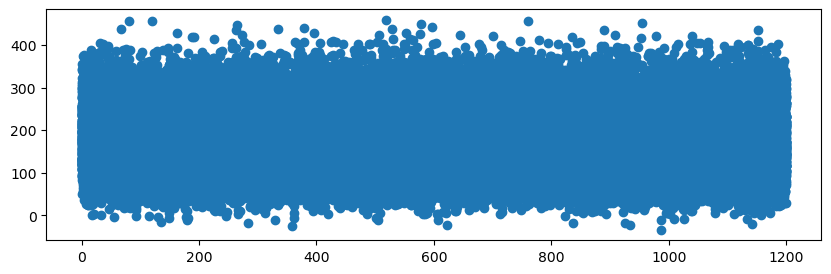

In [4]:
plt.figure(figsize = (10,3))
plt.plot(x, data, "o")

In [5]:
y3=[]
x3=[]
ds=0
for elem in data[0:10000]:
        ds+=elem
for i in range(5000, n-5000):
    ds+=data[i+5000]
    ds-=data[i-5000]
    y3+=[ds/10001]
    x3+=[i/100]
    if ds/10000<150:
        print(i)

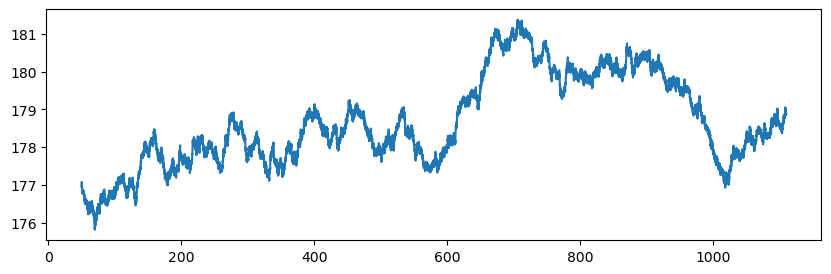

In [6]:
plt.figure(figsize = (10,3))
plt.plot(x3, y3)

In [7]:
#апроксимация
def sum_pow(x, p):
    s=0
    for elem in x:
        s+=elem**p
    return s

def sum2_pow(x, y, p):
    s=0
    for i in range(len(x)):
        s+=y[i]*x[i]**p
    return s

m=5
A=np.array([[sum_pow(x, i+j) for i in range(m) ] for j in range(m)])
B=np.array([ sum2_pow(x, data, i) for i in range(m) ])
X=np.linalg.solve(A, B)

global coef
coef=X
#print(A.dot(X))
#print(B)

def f(x):
    t=[coef[i]*x**i for i in range(len(coef))]
    s=0
    for elem in t:
        s+=elem
    return s

In [8]:
x1=np.linspace(min(x),max(x), len(data))
print(min(x3), max(x3))
y1=f(x1)
data_no_trend=data-y1

50.0 1109.99


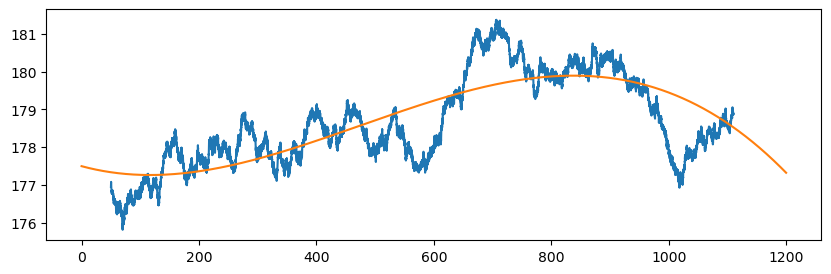

In [9]:
plt.figure(figsize = (10,3))
plt.plot(x3, y3)
plt.plot(x1, y1)


In [10]:
y4=[]
x4=[]
ds=0
for elem in data_no_trend[0:10000]:
        ds+=elem
for i in range(5000, n-5000):
    ds+=data_no_trend[i+5000]
    ds-=data_no_trend[i-5000]
    y4+=[ds/10001]
    x4+=[i/100]

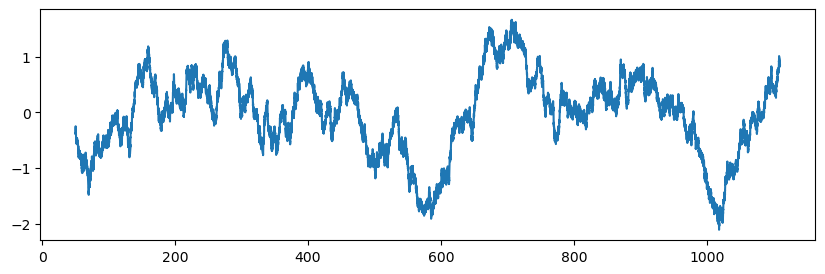

In [11]:
plt.figure(figsize = (10,3))
plt.plot(x4, y4)

# Задание 2

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


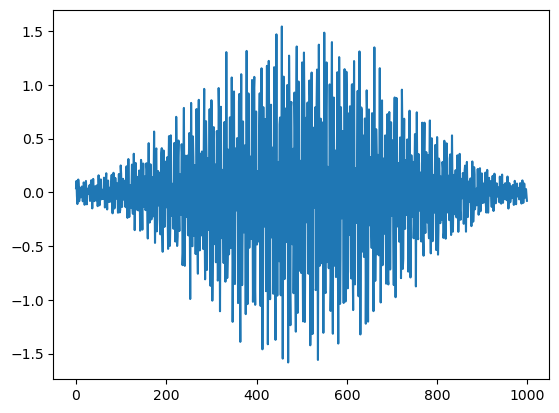

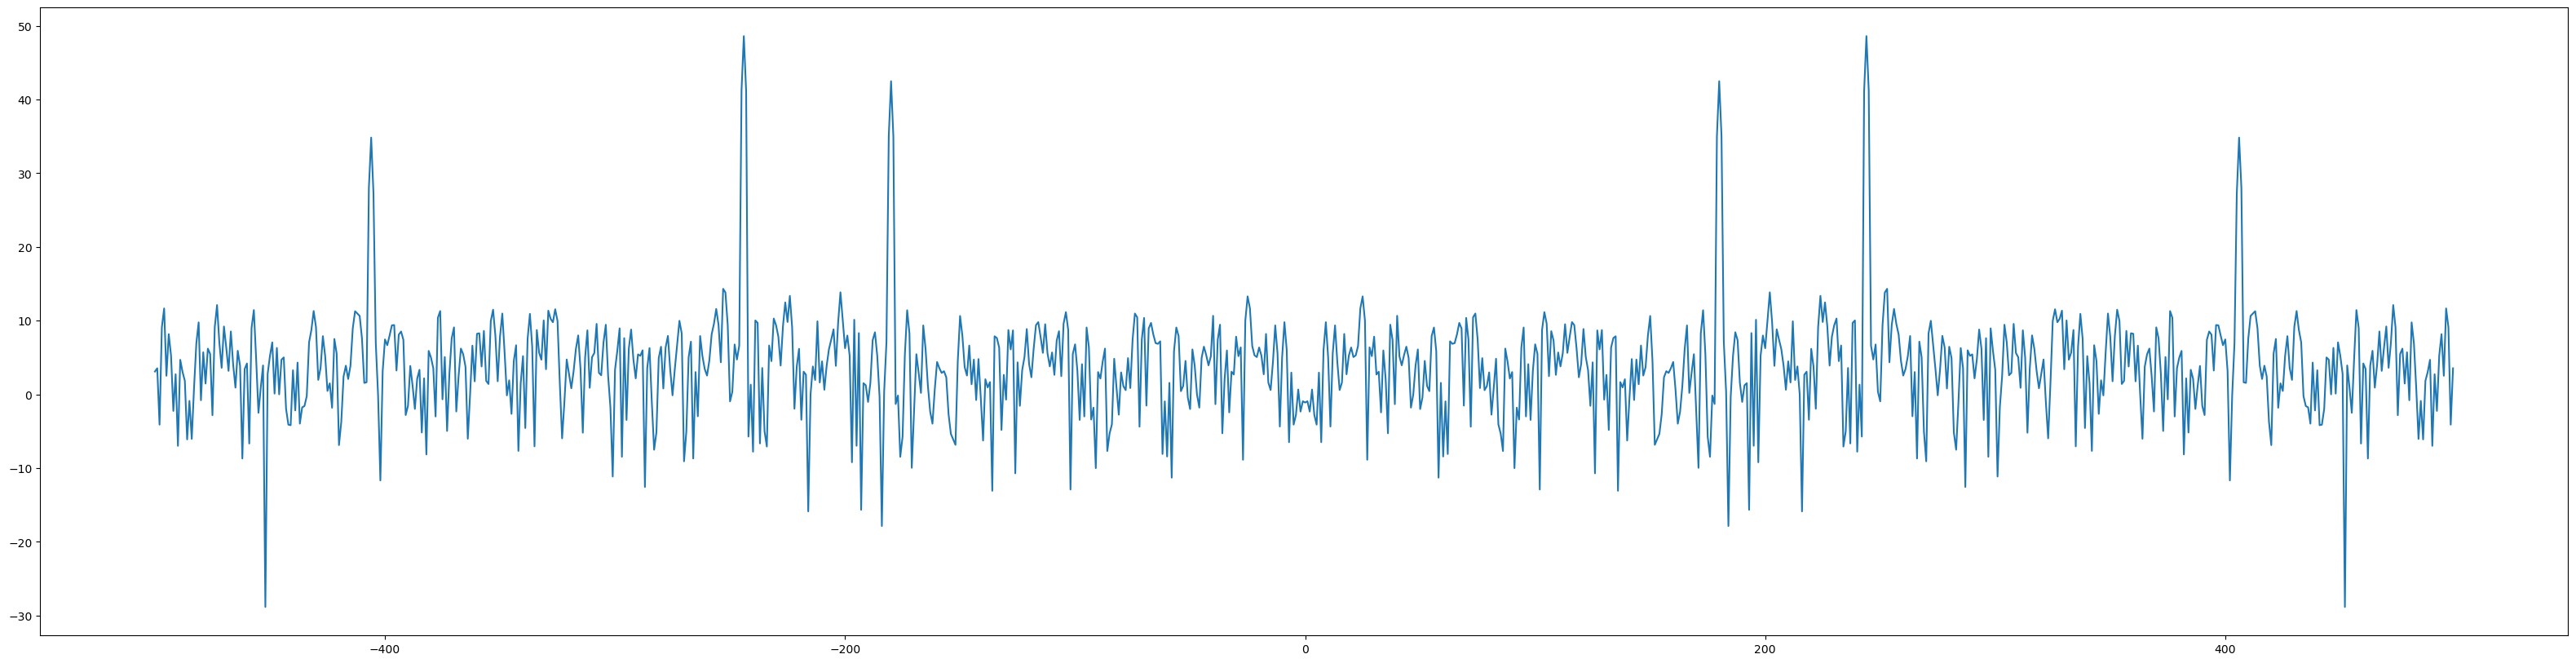

In [12]:
data=np.fromfile("var06_z2.bin", dtype=np.float64)
n=len(data)
window=[(data[i]*(0.54-0.46*cos(2*pi*i/(n-1)))) for i in range(n)]

plt.plot(np.arange(len(data)), window)


spec=np.fft.fft(window)
f_axe=np.fft.fftfreq(len(window), 1/1000)

spec=np.fft.fftshift(spec)
f_axe=np.fft.fftshift(f_axe)

plt.figure(figsize = (40, 10))
#plt.semilogy ()
plt.plot(f_axe, 20*np.log10(spec))

# Задание 3

10000


(array([[6.97739543e-07, 6.36889543e-07, 5.78613944e-07, ...,
         6.96503249e-06, 6.79677296e-06, 6.63089786e-06],
        [2.38869206e-05, 2.39129005e-05, 2.39415383e-05, ...,
         3.28730376e-05, 3.27181327e-05, 3.25643292e-05],
        [1.52331051e-05, 1.52476411e-05, 1.52656630e-05, ...,
         1.15040959e-05, 1.14099730e-05, 1.13146134e-05],
        ...,
        [3.70666623e-05, 3.67280659e-05, 3.63875825e-05, ...,
         6.88473447e-05, 6.87661647e-05, 6.86844239e-05],
        [8.91007498e-05, 8.92909814e-05, 8.94812100e-05, ...,
         8.19967753e-05, 8.21514195e-05, 8.23042831e-05],
        [3.42390065e-05, 3.46390651e-05, 3.50399171e-05, ...,
         2.61800714e-06, 2.70740071e-06, 2.79857653e-06]]),
 array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
        0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
        0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
        0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.

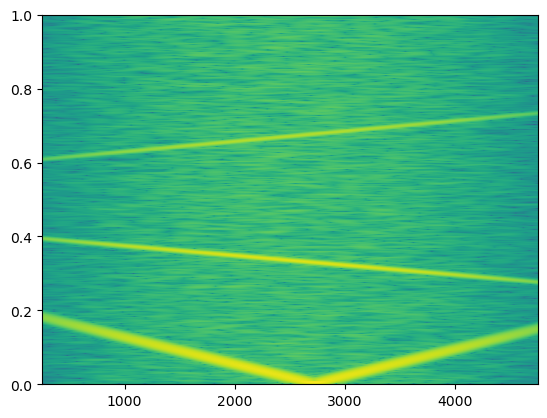

In [13]:
data=np.fromfile("var06_z3.bin", dtype=np.float64)
n=len(data)
x=np.arange(len(data))
print(n)
window=[(data[i]*(0.54-0.46*cos(2*pi*i/(n-1)))) for i in range(n)]
plt.specgram(window, NFFT=1000, noverlap=999)


In [14]:
spec=[]
x=[]
for i in range(0, n-1000):
    d=data[i:i+999]
    n=len(d)
    d=[(d[i]*(0.54-0.46*cos(2*pi*i/(n-1)))) for i in range(n)]
    sp=np.fft.fft(d)
    l=len(sp)//2
    spec+=[[abs(elem) for elem in sp[:l+1]]]
    x+=[i]


time=np.array(x)/1000
freq=ax=np.fft.fftfreq(len(d), d=1/1000)
print(min(freq), max(freq))
freq=np.fft.fftshift(freq)[l:]
print(len(x), len(freq), len(spec), len(spec[5]))
spec=np.array(spec).T


-499.49949949949956 499.49949949949956
9000 500 9000 500


/tmp/ipykernel_96538/2820635281.py:1: UserWarning: shading value 'gourand' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(time, freq, 20*np.log10(spec), shading="gourand", cmap="viridis")


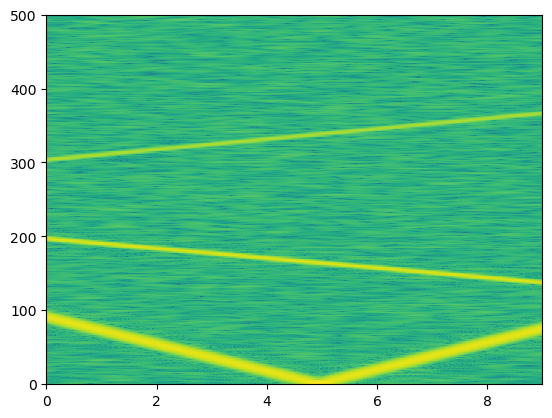

In [15]:
plt.pcolormesh(time, freq, 20*np.log10(spec), shading="gourand", cmap="viridis")